In [144]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

In [134]:
N = 10
DIM = 2

In [135]:
np.random.seed(0)
pts = np.random.random((N,DIM))
pts

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215]])

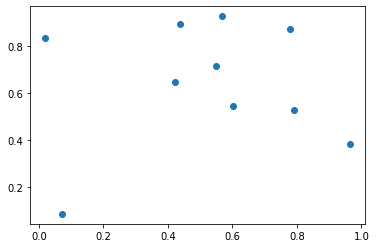

In [136]:
X, Y = pts.T
plt.scatter(X,Y)

In [137]:
def euc_dist(p1, p2):
    return np.sqrt( (p2[0]-p1[0])**2 + (p2[1]-p1[1])**2 )

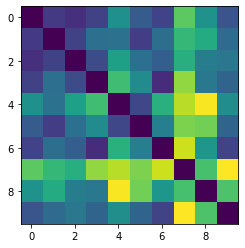

In [138]:

distances = np.zeros((N,N))

for i, p1 in enumerate(pts):
    for j,p2 in enumerate(pts):
        distances[i, j] = euc_dist(p1, p2)

plt.imshow(distances)

In [139]:
sorted_distance_idx = np.zeros((N,N), dtype="int8")

visited = []
for i, p1 in enumerate(pts):
    sorted_distance_idx[i] = np.argsort(distances[i])

sorted_distance_idx

array([[0, 2, 1, 3, 6, 9, 5, 4, 8, 7],
       [1, 0, 5, 2, 9, 6, 3, 4, 8, 7],
       [2, 0, 1, 3, 6, 5, 9, 8, 4, 7],
       [3, 6, 0, 2, 9, 1, 8, 5, 4, 7],
       [4, 5, 1, 9, 0, 2, 6, 3, 7, 8],
       [5, 1, 4, 0, 9, 2, 6, 3, 8, 7],
       [6, 3, 0, 9, 2, 1, 5, 8, 4, 7],
       [7, 2, 1, 8, 0, 5, 3, 4, 6, 9],
       [8, 3, 2, 0, 6, 1, 7, 9, 5, 4],
       [9, 6, 0, 3, 5, 1, 2, 4, 8, 7]], dtype=int8)

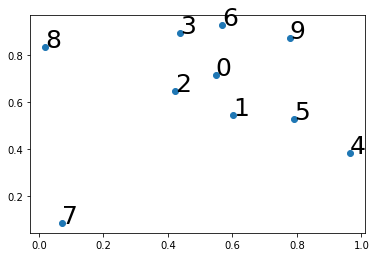

In [140]:
plt.scatter(X,Y)
for i, pt in enumerate(pts):
    plt.text(pt[0], pt[1], i, fontsize=25)

plt.show()

In [153]:
visited = []
start = 5
current = start
while len(visited) != N:
    visited.append(current)
    for pt in sorted_distance_idx[current]:
        if pt not in visited:
            current = pt
            break

print(visited)
    

[5, 1, 0, 2, 3, 6, 9, 4, 7, 8]


(9, 2, 2)
[[[0.79172504 0.52889492]
  [0.60276338 0.54488318]]

 [[0.60276338 0.54488318]
  [0.5488135  0.71518937]]

 [[0.5488135  0.71518937]
  [0.4236548  0.64589411]]

 [[0.4236548  0.64589411]
  [0.43758721 0.891773  ]]

 [[0.43758721 0.891773  ]
  [0.56804456 0.92559664]]

 [[0.56804456 0.92559664]
  [0.77815675 0.87001215]]

 [[0.77815675 0.87001215]
  [0.96366276 0.38344152]]

 [[0.96366276 0.38344152]
  [0.07103606 0.0871293 ]]

 [[0.07103606 0.0871293 ]
  [0.0202184  0.83261985]]]


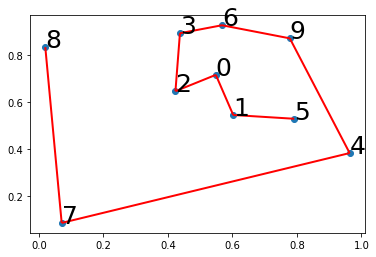

In [154]:
def plotlines(visited):
    pairs=[]
    for i in range(N-1):
        pair = (pts[visited[i]], pts[visited[i+1]])
        pairs.append(pair)
    return np.array(pairs)


lines = plotlines(visited)
print(lines.shape)
print(lines)

lc = mc.LineCollection(lines, color="r", linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)
plt.scatter(X,Y)
for i, pt in enumerate(pts):
    plt.text(pt[0], pt[1], i, fontsize=25)

plt.show()